In [169]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

keras.__version__

'2.8.0'

In [170]:
tf.__version__

'2.8.0'

# Build a perceptron

A binary classifition model using perceptron

In [171]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [172]:
y_pred

array([1])

# Activation functions

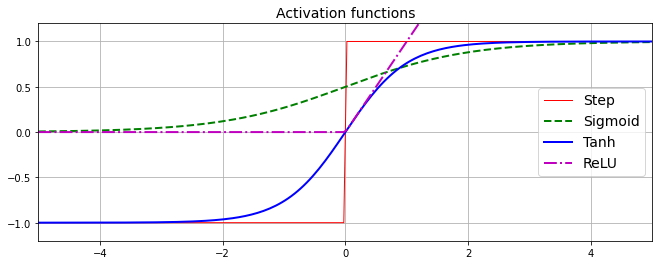

In [173]:
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.show()

# Build deep neural network (multi-layer perceptron) for image classification

Load the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set

In [174]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [175]:
X_train.shape

(60000, 28, 28)

In [176]:
y_train.shape

(60000,)

In [177]:
X_test.shape

(10000, 28, 28)

In [178]:
y_test.shape

(10000,)

Scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [179]:
X_train = X_train / 255.
X_test = X_test / 255.

plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

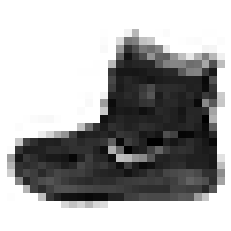

In [180]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [181]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [182]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's take a look at a sample of the images in the dataset:

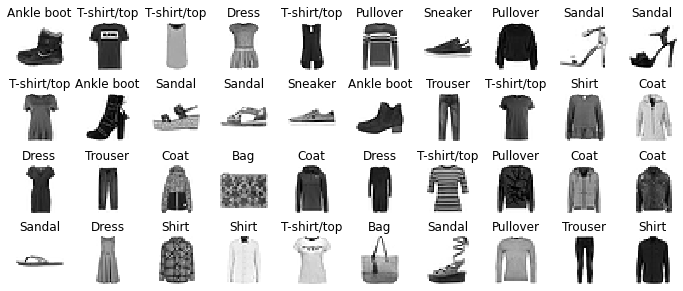

In [183]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Build the model using dropout to avoid overfitting

In [253]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [254]:
model.layers

Display the model structure with parameters

In [255]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-tr

Set up some hyperparameters: use cross entropy loss, stochastic gradient descent optimization, and print out accruacy during training

In [256]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              steps_per_execution=64,
              metrics=["accuracy"])

Train the model: use 30 epochs, and display training loss, training accuracy, validation loss, and validation accuracy. When validation accuracy is much worse than training loss, the model is overfitting 

In [257]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5773 - accuracy: 0.7928 - val_loss: 0.4288 - val_accuracy: 0.8452
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4349 - accuracy: 0.8415 - val_loss: 0.4092 - val_accuracy: 0.8485
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3994 - accuracy: 0.8552 - val_loss: 0.3845 - val_accuracy: 0.8640
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8630 - val_loss: 0.3751 - val_accuracy: 0.8620
Epoch 5/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3627 - accuracy: 0.8683 - val_loss: 0.3701 - val_accuracy: 0.8656
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3493 - accuracy: 0.8729 - val_loss: 0.3581 - val_accuracy: 0.8724
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3419 - accuracy: 0.8746 - val_loss: 0.3535 - val_accuracy:

In [258]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1875}

In [259]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [260]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

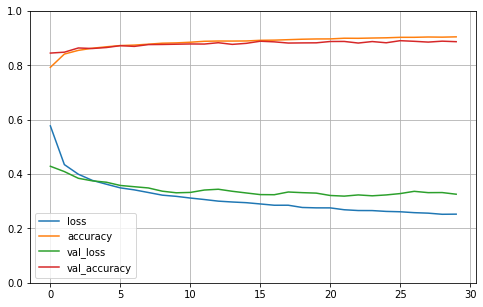

In [261]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluate the train neural network using test data

In [262]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 921us/step - loss: 0.3259 - accuracy: 0.8871


[0.3259032070636749, 0.8870999813079834]

Prediction probability:

In [263]:
test_instance = X_test[:1]
y_proba = model.predict(test_instance)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Prediction label:

In [264]:
y_pred = np.argmax(model.predict(test_instance), axis=-1)
y_pred

array([9])

In [265]:
np.array(class_names)[y_pred]

array(['Ankle boot'], dtype='<U11')